<a href="https://colab.research.google.com/github/HANA-PON/BM25Transformer/blob/master/Step14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step14

In [ ]:
!pip install mglearn

In [ ]:
!pip install hyperopt

In [ ]:
# その他設定
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install mecab-python3

# 形態素分析ライブラリMeCabと辞書（mecab-ipadic-NEologd）のインストール
!apt-get -q -y install sudo file mecab libmecab-dev mecab-ipadic-utf8 git curl python-mecab > /dev/null

!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git > /dev/null

!echo yes | mecab-opadic-neod/bin/install-mecab-ipadic-neologd -n > /dev/null2>&1

!pip install mecab-python3 > /dev/null

# シンボリックリンクによるエラー回避

!ln -s /etc/mecabrc /usr/local/etc/mecabrc

E: Unable to locate package python-mecab
fatal: destination path 'mecab-ipadic-neologd' already exists and is not an empty directory.
/bin/bash: line 1: mecab-opadic-neod/bin/install-mecab-ipadic-neologd: No such file or directory
ln: failed to create symbolic link '/usr/local/etc/mecabrc': File exists


In [ ]:
!echo `mecab-config --dicdir`"/mecab-ipadic-neologd"
#/usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd

/usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd


In [ ]:
# MeCabのインストール
!sudo apt-get install mecab libmecab-dev mecab-ipadic-utf8

# 設定ファイルの場所を確認
!echo `mecab-config --sysconfdir`/mecabrc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libmecab-dev is already the newest version (0.996-14build9).
mecab-ipadic-utf8 is already the newest version (2.7.0-20070801+main-3).
mecab is already the newest version (0.996-14build9).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/etc/mecabrc


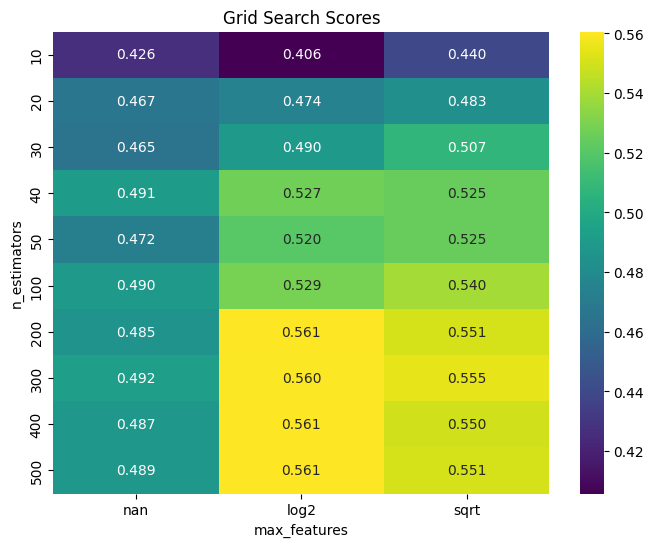

Best params are: {'max_features': 'log2', 'n_estimators': 500}
0.5957446808510638


In [ ]:
#Step14_P.302_List1_grid_search.py
from os.path import dirname, join, normpath
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# from tokenizer import tokenize

# その他設定
import warnings
warnings.filterwarnings('ignore')

# from tokenizer import tokenize
import MeCab

tagger = MeCab.Tagger()


def tokenize(text):
    node = tagger.parseToNode(text)

    tokens = []
    while node:
        if node.surface != '':
            tokens.append(node.surface)

        node = node.next

    return tokens

# Load training data
BASE_DIR = normpath(dirname('/content/drive/MyDrive/CU/★講義/2024前期/ゼミナール田中頼人/'))

training_data = pd.read_csv(join(BASE_DIR, './training_data.csv'))
train_texts = training_data['text']
train_labels = training_data['label']

# Feature extraction
vectorizer = TfidfVectorizer(tokenizer=tokenize, ngram_range=(1, 2))
train_vectors = vectorizer.fit_transform(train_texts)

# Grid search
parameters = {  # <1>
    'n_estimators': [10, 20, 30, 40, 50, 100, 200, 300, 400, 500],
    'max_features': ('sqrt', 'log2', None),
}
classifier = RandomForestClassifier()
gridsearch = GridSearchCV(classifier, parameters)  # <2>

gridsearch.fit(train_vectors, train_labels)  # <3>
# cv_results_から結果を取得
results = pd.DataFrame(gridsearch.cv_results_)

# パフォーマンスのスコアを抽出してリシェイプ
scores = results.pivot(index='param_n_estimators', columns='param_max_features', values='mean_test_score')

# ヒートマップをプロット
plt.figure(figsize=(8, 6))
sns.heatmap(scores, annot=True, cmap='viridis', fmt=".3f")
plt.title('Grid Search Scores')
plt.xlabel('max_features')
plt.ylabel('n_estimators')
plt.show()
print('Best params are: {}'.format(gridsearch.best_params_))  # <4>

# Load test data
test_data = pd.read_csv(join(BASE_DIR, './test_data.csv'))
test_texts = test_data['text']
test_labels = test_data['label']

# Classification with the best parameters
test_vectors = vectorizer.transform(test_texts)
predictions = gridsearch.predict(test_vectors)  # <5>
print(accuracy_score(test_data['label'], predictions))  # <5>

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics import accuracy_score

# # パラメータグリッドの設定（例としてRandomForestClassifierを使用）
# parameters = {
#     'n_estimators': [10, 50, 100, 200],
#     'max_features': ['sqrt', 'log2', None]
# }

# # 仮のデータセットとモデルでGridSearchCVを実行
# # 以下の行は、あなたの実際のデータとモデルで適切に置き換える必要があります
# # vectorizer = TfidfVectorizer()
# # train_vectors = vectorizer.fit_transform(['sample text', 'another text'])
# # train_labels = [0, 1]

# classifier = RandomForestClassifier()
# gridsearch = GridSearchCV(classifier, parameters, cv=3)
# gridsearch.fit(train_vectors, train_labels)

# # cv_results_から結果を取得
# results = pd.DataFrame(gridsearch.cv_results_)

# # パフォーマンスのスコアを抽出してリシェイプ
# scores = results.pivot(index='param_n_estimators', columns='param_max_features', values='mean_test_score')

# # ヒートマップをプロット
# plt.figure(figsize=(8, 6))
# sns.heatmap(scores, annot=True, cmap='viridis', fmt=".3f")
# plt.title('Grid Search Scores')
# plt.xlabel('max_features')
# plt.ylabel('n_estimators')
# plt.show()


NameError: name 'train_vectors' is not defined

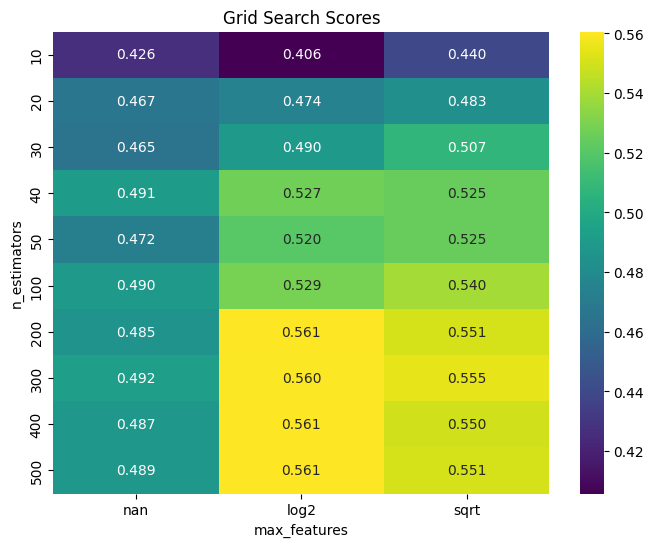

Best params are: {'max_features': 'sqrt', 'n_estimators': 200}
0.5957446808510638
Best params are: {'max_features': 'sqrt', 'n_estimators': 200}
0.5957446808510638


In [ ]:
#Step14_P.302_List1_grid_search.py
from os.path import dirname, join, normpath

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# from tokenizer import tokenize

# その他設定
import warnings
warnings.filterwarnings('ignore')

# from tokenizer import tokenize
import MeCab

tagger = MeCab.Tagger()


def tokenize(text):
    node = tagger.parseToNode(text)

    tokens = []
    while node:
        if node.surface != '':
            tokens.append(node.surface)

        node = node.next

    return tokens

# Load training data
BASE_DIR = normpath(dirname('/content/drive/MyDrive/CU/★講義/2024前期/ゼミナール田中頼人/'))

training_data = pd.read_csv(join(BASE_DIR, './training_data.csv'))
train_texts = training_data['text']
train_labels = training_data['label']

# Feature extraction
vectorizer = TfidfVectorizer(tokenizer=tokenize, ngram_range=(1, 2))
train_vectors = vectorizer.fit_transform(train_texts)

# Grid search
parameters = {  # <1>
    'n_estimators': [10, 20, 30, 40, 50, 100, 200, 300, 400, 500],
    'max_features': ('sqrt', 'log2', None),
}
classifier = RandomForestClassifier()
gridsearch = GridSearchCV(classifier, parameters)  # <2>

gridsearch.fit(train_vectors, train_labels)  # <3>
# パフォーマンスのスコアを抽出してリシェイプ
scores = results.pivot(index='param_n_estimators', columns='param_max_features', values='mean_test_score')

# ヒートマップをプロット
plt.figure(figsize=(8, 6))
sns.heatmap(scores, annot=True, cmap='viridis', fmt=".3f")
plt.title('Grid Search Scores')
plt.xlabel('max_features')
plt.ylabel('n_estimators')
plt.show()
print('Best params are: {}'.format(gridsearch.best_params_))  # <4>

# Load test data
test_data = pd.read_csv(join(BASE_DIR, './test_data.csv'))
test_texts = test_data['text']
test_labels = test_data['label']

# Classification with the best parameters
test_vectors = vectorizer.transform(test_texts)
predictions = gridsearch.predict(test_vectors)  # <5>
print(accuracy_score(test_data['label'], predictions))  # <5>

print('Best params are: {}'.format(gridsearch.best_params_))  # <4>

# Load test data
test_data = pd.read_csv(join(BASE_DIR, './test_data.csv'))
test_texts = test_data['text']
test_labels = test_data['label']

# Classification with the best parameters
test_vectors = vectorizer.transform(test_texts)
predictions = gridsearch.predict(test_vectors)  # <5>
print(accuracy_score(test_data['label'], predictions))  # <5>

In [ ]:
!pip install neologdn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.6/144.6 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for neologdn: filename=neologdn-0.5.3-cp310-cp310-linux_x86_64.whl size=223872 sha256=73a6a52360f1c5c1795674b45e14205ea30e5f72869640e280980ce1c5826623
  Stored in directory: /root/.cache/pip/wheels/f3/06/cd/3216b1007983e3cde801f6376c641617c37f4f520f9faed644
Successfully built neologdn


In [ ]:
#Step14_P.303_List2_dialogue_agent_pipeline_gridsearch.py

"""
isort:skip_file
"""
from os.path import normpath, dirname, join
import MeCab
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import pandas as pd
import unicodedata
import neologdn


tagger = MeCab.Tagger()


def tokenize(text):
    text = unicodedata.normalize('NFKC', text)  # <1>
    text = neologdn.normalize(text)  # <2>
    text = text.lower()  # <3>

    node = tagger.parseToNode(text)
    result = []
    while node:
        features = node.feature.split(',')

        if features[0] != 'BOS/EOS':
            if features[0] not in ['助詞', '助動詞']:  # <4>
                token = features[6] \
                        if features[6] != '*' \
                        else node.surface  # <5>
                result.append(token)

        node = node.next

    return result


class DialogueAgent:
    def __init__(self):
        self.tagger = MeCab.Tagger()

    def _tokenize(self, text):
        text = unicodedata.normalize('NFKC', text)  # <1>
        text = neologdn.normalize(text)  # <2>
        text = text.lower()  # <3>

        node = self.tagger.parseToNode(text)
        result = []
        while node:
            features = node.feature.split(',')

            if features[0] != 'BOS/EOS':
                if features[0] not in ['助詞', '助動詞']:  # <4>
                    token = features[6] \
                            if features[6] != '*' \
                            else node.surface  # <5>
                    result.append(token)

            node = node.next

        return result

    def train(self, texts, labels):
        pipeline = Pipeline([
            ('vectorizer', TfidfVectorizer(tokenizer=tokenize,
                                           ngram_range=(1, 2))),
            ('classifier', RandomForestClassifier()),
        ])

        parameters = {
            'vectorizer__ngram_range':
                [(1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3)],
            'classifier__n_estimators':
                [10, 20, 30, 40, 50, 100, 200, 300, 400, 500],
            'classifier__max_features':
                ('sqrt', 'log2', None),
        }
        clf = GridSearchCV(pipeline, parameters)

        clf.fit(texts, labels)

        self.clf = clf

    def predict(self, texts):
        return self.clf.predict(texts)



if __name__ == '__main__':
    BASE_DIR = normpath(dirname('/content/drive/MyDrive/CU/★講義/2024前期/ゼミナール田中頼人/'))

    training_data = pd.read_csv(join(BASE_DIR, './training_data.csv'))

    dialogue_agent = DialogueAgent()
    dialogue_agent.train(training_data['text'], training_data['label'])
    print('Training completed.')
    print(dialogue_agent.clf.best_params_)
#     with open(join(BASE_DIR, './replies.csv')) as f:
#         replies = f.read().split('\n')

#     input_text = '名前は？'
#     predictions = dialogue_agent.predict([input_text])
#     predicted_class_id = predictions[0]

#     print(replies[predicted_class_id])

#     while True:
#         input_text = input()
#         predictions = dialogue_agent.predict([input_text])
#         predicted_class_id = predictions[0]

#         print(replies[predicted_class_id])

Training completed.
{'classifier__max_features': 'log2', 'classifier__n_estimators': 400, 'vectorizer__ngram_range': (1, 1)}


In [ ]:
# print(dialogue_agent.clf.best_params_)

In [ ]:
#Step01_P.80_List21_evaluate_dialogue_agent.py
from os.path import dirname, join, normpath

import pandas as pd
from sklearn.metrics import accuracy_score

# from dialogue_agent import DialogueAgent  # <1>
class DialogueAgent:
    def __init__(self):
        self.tagger = MeCab.Tagger()

    def _tokenize(self, text):
        text = unicodedata.normalize('NFKC', text)  # <1>
        text = neologdn.normalize(text)  # <2>
        text = text.lower()  # <3>

        node = self.tagger.parseToNode(text)
        result = []
        while node:
            features = node.feature.split(',')

            if features[0] != 'BOS/EOS':
                if features[0] not in ['助詞', '助動詞']:  # <4>
                    token = features[6] \
                            if features[6] != '*' \
                            else node.surface  # <5>
                    result.append(token)

            node = node.next

        return result

    def train(self, texts, labels):
        pipeline = Pipeline([
            ('vectorizer', TfidfVectorizer(tokenizer=tokenize,
                                           ngram_range=(1, 2))),
            ('classifier', RandomForestClassifier()),
        ])

        parameters = {
            'vectorizer__ngram_range':
                [(1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3)],
            'classifier__n_estimators':
                [10, 20, 30, 40, 50, 100, 200, 300, 400, 500],
            'classifier__max_features':
                ('sqrt', 'log2', None),
        }
        clf = GridSearchCV(pipeline, parameters)

        clf.fit(texts, labels)

        self.clf = clf

    def predict(self, texts):
        return self.clf.predict(texts)


if __name__ == '__main__':
    BASE_DIR = normpath(dirname('/content/drive/MyDrive/CU/★講義/2024前期/ゼミナール田中頼人/'))

    # Training
    training_data = pd.read_csv(join(BASE_DIR, 'training_data.csv'))

    dialogue_agent = DialogueAgent()
    dialogue_agent.train(training_data['text'], training_data['label'])  # <2>

    # Evaluation
    test_data = pd.read_csv(join(BASE_DIR, 'test_data.csv'))  # <3>

    predictions = dialogue_agent.predict(test_data['text'])  # <4>

    print(accuracy_score(test_data['label'], predictions))  # <5>



0.723404255319149


In [ ]:
# from keras.utils import to_categorical
# !pip install keras
# !pip install tensorflow

In [ ]:
# #Step01_P.80_List21_evaluate_dialogue_agent.py
# from os.path import dirname, join, normpath
# #Step09_P.220_List2_dialogue_agent1.py
# # Step04_P.126_List0_bm25.py
# # coding: UTF-8
# # https://github.com/arosh/BM25Transformer
# from __future__ import absolute_import, division, print_function, unicode_literals
# import numpy as np
# import scipy.sparse as sp
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.utils.validation import check_is_fitted
# from sklearn.feature_extraction.text import _document_frequency
# """
# isort:skip_file
# """
# import MeCab
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import SVC
# import pandas as pd
# import numpy as np
# import unicodedata
# import neologdn
# # from bm25 import BM25Transformer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from keras.layers import Conv1D, Dense, Embedding, Flatten, MaxPooling1D
# from keras.models import Sequential
# from keras.preprocessing.sequence import pad_sequences
# # from keras.utils.np_utils import to_categorical
# # Import to_categorical from the correct module
# from tensorflow.keras.utils import to_categorical

# tagger = MeCab.Tagger()
# texts = [
#     '私は私のことが好きなあなたが好きです',
#     '私はラーメンが好きです。',
#     '富士山は日本一高い山です',
# ]

# def tokenize(text):
#     text = unicodedata.normalize('NFKC', text)  # <1>
#     text = neologdn.normalize(text)  # <2>
#     text = text.lower()  # <3>

#     node = tagger.parseToNode(text)
#     result = []
#     while node:
#         features = node.feature.split(',')

#         if features[0] != 'BOS/EOS':
#             if features[0] not in ['助詞', '助動詞']:  # <4>
#                 token = features[6] \
#                         if features[6] != '*' \
#                         else node.surface  # <5>
#                 result.append(token)

#         node = node.next

#     return result


# class BM25Transformer(BaseEstimator, TransformerMixin):
#     def __init__(self, use_idf=True, k1=2.0, b=0.75):
#         self.use_idf = use_idf
#         self.k1 = k1
#         self.b = b

#     def fit(self, X, y=None):
#         if not sp.issparse(X):
#             X = sp.csc_matrix(X)
#         if self.use_idf:
#             n_samples, n_features = X.shape
#             df = (X > 0).sum(axis=0).A1  # Document Frequency
#             idf = np.log((n_samples - df + 0.5) / (df + 0.5))# Inverse Document Frequency
#             self._idf_diag = sp.spdiags(idf, diags=0, m=n_features, n=n_features)
#         return self

#     def transform(self, X, copy=True):
#         if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.floating):
#             X = sp.csr_matrix(X, copy=copy)
#         else:
#             X = sp.csr_matrix(X, dtype=np.float64, copy=copy)

#         n_samples, n_features = X.shape
#         dl = X.sum(axis=1).A1
#         avgdl = np.mean(dl)

#         # Correct approach to obtain dl for each non-zero element
#         normalized_dl = np.zeros_like(X.data)
#         for i in range(n_samples):
#             start_idx, end_idx = X.indptr[i], X.indptr[i + 1]
#             normalized_dl[start_idx:end_idx] = dl[i]

#         data = X.data * (self.k1 + 1) / (X.data + self.k1 * (1 - self.b + self.b * normalized_dl / avgdl))
#         X = sp.csr_matrix((data, X.indices, X.indptr), shape=X.shape)

#         if self.use_idf:
#             check_is_fitted(self, '_idf_diag', 'idf vector is not fitted')
#             X = X * self._idf_diag

#         return X

# class DialogueAgent:
#     def __init__(self):
#         self.tagger = MeCab.Tagger()

#     def _tokenize(self, text):
#         text = unicodedata.normalize('NFKC', text)  # <1>
#         text = neologdn.normalize(text)  # <2>
#         text = text.lower()  # <3>

#         node = self.tagger.parseToNode(text)
#         result = []
#         while node:
#             features = node.feature.split(',')

#             if features[0] != 'BOS/EOS':
#                 if features[0] not in ['助詞', '助動詞']:  # <4>
#                     token = features[6] \
#                             if features[6] != '*' \
#                             else node.surface  # <5>
#                     result.append(token)

#             node = node.next

#         return result

#     def train(self, texts, labels):
#         vectorizer = TfidfVectorizer(tokenizer=self._tokenize, ngram_range=(1, 2))

#         tfidf = vectorizer.fit_transform(texts)
#         feature_dim = len(vectorizer.get_feature_names())
#         n_labels = max(labels) + 1

#         mlp = Sequential()
#         mlp.add(Dense(units=32, input_dim=feature_dim, activation='relu'))
#         mlp.add(Dense(units=n_labels, activation='softmax'))
#         mlp.compile(loss='categorical_crossentropy', optimizer='adam')

#         labels_onehot = to_categorical(labels, n_labels)
#         mlp.fit(tfidf, labels_onehot, epochs=100)

#         self.vectorizer = vectorizer
#         self.mlp = mlp

#     def predict(self, texts):
#         tfidf = self.vectorizer.transform(texts)
#         predictions = self.mlp.predict(tfidf)
#         predicted_labels = np.argmax(predictions, axis=1)
#         return predicted_labels


# if __name__ == '__main__':
#     BASE_DIR = normpath(dirname('/content/drive/MyDrive/CU/★講義/2024前期/ゼミナール田中頼人/'))

#     # Training
#     training_data = pd.read_csv(join(BASE_DIR, 'training_data.csv'))

#     dialogue_agent = DialogueAgent()
#     dialogue_agent.train(training_data['text'], training_data['label'])  # <2>

#     # Evaluation
#     test_data = pd.read_csv(join(BASE_DIR, 'test_data.csv'))  # <3>

#     predictions = dialogue_agent.predict(test_data['text'])  # <4>

#     print(accuracy_score(test_data['label'], predictions))  # <5>



In [ ]:
# #Step01_P.80_List21_evaluate_dialogue_agent.py
# from os.path import dirname, join, normpath
# #Step09_P.220_List2_dialogue_agent1.py
# # Step04_P.126_List0_bm25.py
# # coding: UTF-8
# # https://github.com/arosh/BM25Transformer
# from __future__ import absolute_import, division, print_function, unicode_literals
# import numpy as np
# import scipy.sparse as sp
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.utils.validation import check_is_fitted
# from sklearn.feature_extraction.text import _document_frequency
# from sklearn.metrics import accuracy_score  # Import accuracy_score
# """
# isort:skip_file
# """
# import MeCab
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import SVC
# import pandas as pd
# import numpy as np
# import unicodedata
# import neologdn
# # from bm25 import BM25Transformer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from keras.layers import Conv1D, Dense, Embedding, Flatten, MaxPooling1D
# from keras.models import Sequential
# from keras.preprocessing.sequence import pad_sequences
# # from keras.utils.np_utils import to_categorical
# # Import to_categorical from the correct module
# from tensorflow.keras.utils import to_categorical

# tagger = MeCab.Tagger()
# texts = [
#     '私は私のことが好きなあなたが好きです',
#     '私はラーメンが好きです。',
#     '富士山は日本一高い山です',
# ]

# def tokenize(text):
#     text = unicodedata.normalize('NFKC', text)  # <1>
#     text = neologdn.normalize(text)  # <2>
#     text = text.lower()  # <3>

#     node = tagger.parseToNode(text)
#     result = []
#     while node:
#         features = node.feature.split(',')

#         if features[0] != 'BOS/EOS':
#             if features[0] not in ['助詞', '助動詞']:  # <4>
#                 token = features[6] \
#                         if features[6] != '*' \
#                         else node.surface  # <5>
#                 result.append(token)

#         node = node.next

#     return result


# class BM25Transformer(BaseEstimator, TransformerMixin):
#     def __init__(self, use_idf=True, k1=2.0, b=0.75):
#         self.use_idf = use_idf
#         self.k1 = k1
#         self.b = b

#     def fit(self, X, y=None):
#         if not sp.issparse(X):
#             X = sp.csc_matrix(X)
#         if self.use_idf:
#             n_samples, n_features = X.shape
#             df = (X > 0).sum(axis=0).A1  # Document Frequency
#             idf = np.log((n_samples - df + 0.5) / (df + 0.5))# Inverse Document Frequency
#             self._idf_diag = sp.spdiags(idf, diags=0, m=n_features, n=n_features)
#         return self

#     def transform(self, X, copy=True):
#         if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.floating):
#             X = sp.csr_matrix(X, copy=copy)
#         else:
#             X = sp.csr_matrix(X, dtype=np.float64, copy=copy)

#         n_samples, n_features = X.shape
#         dl = X.sum(axis=1).A1
#         avgdl = np.mean(dl)

#         # Correct approach to obtain dl for each non-zero element
#         normalized_dl = np.zeros_like(X.data)
#         for i in range(n_samples):
#             start_idx, end_idx = X.indptr[i], X.indptr[i + 1]
#             normalized_dl[start_idx:end_idx] = dl[i]

#         data = X.data * (self.k1 + 1) / (X.data + self.k1 * (1 - self.b + self.b * normalized_dl / avgdl))
#         X = sp.csr_matrix((data, X.indices, X.indptr), shape=X.shape)

#         if self.use_idf:
#             check_is_fitted(self, '_idf_diag', 'idf vector is not fitted')
#             X = X * self._idf_diag

#         return X

# class DialogueAgent:
#     def __init__(self):
#         self.tagger = MeCab.Tagger()

#     def _tokenize(self, text):
#         text = unicodedata.normalize('NFKC', text)  # <1>
#         text = neologdn.normalize(text)  # <2>
#         text = text.lower()  # <3>

#         node = self.tagger.parseToNode(text)
#         result = []
#         while node:
#             features = node.feature.split(',')

#             if features[0] != 'BOS/EOS':
#                 if features[0] not in ['助詞', '助動詞']:  # <4>
#                     token = features[6] \
#                             if features[6] != '*' \
#                             else node.surface  # <5>
#                     result.append(token)

#             node = node.next

#         return result

#     def train(self, texts, labels):
#         vectorizer = TfidfVectorizer(tokenizer=self._tokenize, ngram_range=(1, 2))

#         tfidf = vectorizer.fit_transform(texts)
#         feature_dim = len(vectorizer.get_feature_names_out())  # Updated method name
#         n_labels = max(labels) + 1

#         mlp = Sequential()
#         mlp.add(Dense(units=32, input_dim=feature_dim, activation='relu'))
#         mlp.add(Dense(units=n_labels, activation='softmax'))
#         mlp.compile(loss='categorical_crossentropy', optimizer='adam')

#         labels_onehot = to_categorical(labels, n_labels)
#         mlp.fit(tfidf, labels_onehot, epochs=100)

#         self.vectorizer = vectorizer
#         self.mlp = mlp

#     def predict(self, texts):
#         tfidf = self.vectorizer.transform(texts)
#         predictions = self.mlp.predict(tfidf)
#         predicted_labels = np.argmax(predictions, axis=1)
#         return predicted_labels


# if __name__ == '__main__':
#     BASE_DIR = normpath(dirname('/content/drive/MyDrive/CU/★講義/2024前期/ゼミナール田中頼人/'))

#     # Training
#     training_data = pd.read_csv(join(BASE_DIR, 'training_data.csv'))

#     dialogue_agent = DialogueAgent()
#     dialogue_agent.train(training_data['text'], training_data['label'])  # <2>

#     # Evaluation
#     test_data = pd.read_csv(join(BASE_DIR, 'test_data.csv'))  # <3>

#     predictions = dialogue_agent.predict(test_data['text'])  # <4>

#     print(accuracy_score(test_data['label'], predictions))  # <5>


In [ ]:
# Step01_P.80_List21_evaluate_dialogue_agent.py
from os.path import dirname, join, normpath
# Step09_P.220_List2_dialogue_agent1.py
# Step04_P.126_List0_bm25.py
# coding: UTF-8
# https://github.com/arosh/BM25Transformer
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import scipy.sparse as sp
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
from sklearn.feature_extraction.text import _document_frequency
from sklearn.metrics import accuracy_score  # Import accuracy_score
import tensorflow as tf  # Import TensorFlow for sparse matrix handling
"""
isort:skip_file
"""
import MeCab
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import unicodedata
import neologdn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from keras.layers import Conv1D, Dense, Embedding, Flatten, MaxPooling1D
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

tagger = MeCab.Tagger()
# texts = [
#     '私は私のことが好きなあなたが好きです',
#     '私はラーメンが好きです。',
#     '富士山は日本一高い山です',
# ]

def tokenize(text):
    text = unicodedata.normalize('NFKC', text)  # <1>
    text = neologdn.normalize(text)  # <2>
    text = text.lower()  # <3>

    node = tagger.parseToNode(text)
    result = []
    while node:
        features = node.feature.split(',')

        if features[0] != 'BOS/EOS':
            if features[0] not in ['助詞', '助動詞']:  # <4>
                token = features[6] \
                        if features[6] != '*' \
                        else node.surface  # <5>
                result.append(token)

        node = node.next

    return result

class BM25Transformer(BaseEstimator, TransformerMixin):
    def __init__(self, use_idf=True, k1=2.0, b=0.75):
        self.use_idf = use_idf
        self.k1 = k1
        self.b = b

    def fit(self, X, y=None):
        if not sp.issparse(X):
            X = sp.csc_matrix(X)
        if self.use_idf:
            n_samples, n_features = X.shape
            df = (X > 0).sum(axis=0).A1  # Document Frequency
            idf = np.log((n_samples - df + 0.5) / (df + 0.5))  # Inverse Document Frequency
            self._idf_diag = sp.spdiags(idf, diags=0, m=n_features, n=n_features)
        return self

    def transform(self, X, copy=True):
        if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.floating):
            X = sp.csr_matrix(X, copy=copy)
        else:
            X = sp.csr_matrix(X, dtype=np.float64, copy=copy)

        n_samples, n_features = X.shape
        dl = X.sum(axis=1).A1
        avgdl = np.mean(dl)

        # Correct approach to obtain dl for each non-zero element
        normalized_dl = np.zeros_like(X.data)
        for i in range(n_samples):
            start_idx, end_idx = X.indptr[i], X.indptr[i + 1]
            normalized_dl[start_idx:end_idx] = dl[i]

        data = X.data * (self.k1 + 1) / (X.data + self.k1 * (1 - self.b + self.b * normalized_dl / avgdl))
        X = sp.csr_matrix((data, X.indices, X.indptr), shape=X.shape)

        if self.use_idf:
            check_is_fitted(self, '_idf_diag', 'idf vector is not fitted')
            X = X * self._idf_diag

        return X

class DialogueAgent:
    def __init__(self):
        self.tagger = MeCab.Tagger()

    def _tokenize(self, text):
        text = unicodedata.normalize('NFKC', text)  # <1>
        text = neologdn.normalize(text)  # <2>
        text = text.lower()  # <3>

        node = self.tagger.parseToNode(text)
        result = []
        while node:
            features = node.feature.split(',')

            if features[0] != 'BOS/EOS':
                if features[0] not in ['助詞', '助動詞']:  # <4>
                    token = features[6] \
                            if features[6] != '*' \
                            else node.surface  # <5>
                    result.append(token)

            node = node.next

        return result

    def train(self, texts, labels):
        vectorizer = TfidfVectorizer(tokenizer=self._tokenize, ngram_range=(1, 2))

        tfidf = vectorizer.fit_transform(texts)
        feature_dim = len(vectorizer.get_feature_names_out())  # Updated method name
        n_labels = max(labels) + 1

        mlp = Sequential()
        mlp.add(Dense(units=32, input_dim=feature_dim, activation='relu'))
        mlp.add(Dense(units=n_labels, activation='softmax'))
        mlp.compile(loss='categorical_crossentropy', optimizer='adam')

        labels_onehot = to_categorical(labels, n_labels)
        # Convert tfidf to sparse tensor and reorder it
        sparse_tfidf = tf.sparse.reorder(tf.sparse.from_dense(tfidf.toarray()))
        mlp.fit(sparse_tfidf, labels_onehot, epochs=100)

        self.vectorizer = vectorizer
        self.mlp = mlp

    def predict(self, texts):
        tfidf = self.vectorizer.transform(texts)
        sparse_tfidf = tf.sparse.reorder(tf.sparse.from_dense(tfidf.toarray()))
        predictions = self.mlp.predict(sparse_tfidf)
        predicted_labels = np.argmax(predictions, axis=1)
        return predicted_labels

if __name__ == '__main__':
    BASE_DIR = normpath(dirname('/content/drive/MyDrive/CU/★講義/2024前期/ゼミナール田中頼人/'))

    # Training
    training_data = pd.read_csv(join(BASE_DIR, 'training_data.csv'))

    dialogue_agent = DialogueAgent()
    dialogue_agent.train(training_data['text'], training_data['label'])  # <2>

    # Evaluation
    test_data = pd.read_csv(join(BASE_DIR, 'test_data.csv'))  # <3>

    predictions = dialogue_agent.predict(test_data['text'])  # <4>

    print(accuracy_score(test_data['label'], predictions))  # <5>


Epoch 1/100
29/29 [==============================] - 1s 4ms/step - loss: 3.8901
Epoch 2/100
29/29 [==============================] - 0s 4ms/step - loss: 3.8571
Epoch 3/100
29/29 [==============================] - 0s 4ms/step - loss: 3.8057
Epoch 4/100
29/29 [==============================] - 0s 4ms/step - loss: 3.7224
Epoch 5/100
29/29 [==============================] - 0s 3ms/step - loss: 3.6096
Epoch 6/100
29/29 [==============================] - 0s 3ms/step - loss: 3.4689
Epoch 7/100
29/29 [==============================] - 0s 3ms/step - loss: 3.2995
Epoch 8/100
29/29 [==============================] - 0s 4ms/step - loss: 3.1038
Epoch 9/100
29/29 [==============================] - 0s 3ms/step - loss: 2.8839
Epoch 10/100
29/29 [==============================] - 0s 3ms/step - loss: 2.6454
Epoch 11/100
29/29 [==============================] - 0s 5ms/step - loss: 2.3912
Epoch 12/100
29/29 [==============================] - 0s 4ms/step - loss: 2.1315
Epoch 13/100
29/29 [=================

In [ ]:
#Step14_P.303_List2_dialogue_agent_pipeline_gridsearch.py

"""
isort:skip_file
"""
from os.path import normpath, dirname, join
import MeCab
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import pandas as pd
import unicodedata
import neologdn


tagger = MeCab.Tagger()


def tokenize(text):
    text = unicodedata.normalize('NFKC', text)  # <1>
    text = neologdn.normalize(text)  # <2>
    text = text.lower()  # <3>

    node = tagger.parseToNode(text)
    result = []
    while node:
        features = node.feature.split(',')

        if features[0] != 'BOS/EOS':
            if features[0] not in ['助詞', '助動詞']:  # <4>
                token = features[6] \
                        if features[6] != '*' \
                        else node.surface  # <5>
                result.append(token)

        node = node.next

    return result


class DialogueAgent:
    def __init__(self):
        self.tagger = MeCab.Tagger()

    def _tokenize(self, text):
        text = unicodedata.normalize('NFKC', text)  # <1>
        text = neologdn.normalize(text)  # <2>
        text = text.lower()  # <3>

        node = self.tagger.parseToNode(text)
        result = []
        while node:
            features = node.feature.split(',')

            if features[0] != 'BOS/EOS':
                if features[0] not in ['助詞', '助動詞']:  # <4>
                    token = features[6] \
                            if features[6] != '*' \
                            else node.surface  # <5>
                    result.append(token)

            node = node.next

        return result

    def train(self, texts, labels):
        pipeline = Pipeline([
            ('vectorizer', TfidfVectorizer(tokenizer=tokenize,
                                           ngram_range=(1, 2))),
            ('classifier', RandomForestClassifier()),
        ])

        parameters = {
            'vectorizer__ngram_range':
                [(1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3)],
            'classifier__n_estimators':
                [10, 20, 30, 40, 50, 100, 200, 300, 400, 500],
            'classifier__max_features':
                ('sqrt', 'log2', None),
        }
        clf = GridSearchCV(pipeline, parameters)

        clf.fit(texts, labels)

        self.clf = clf

    def predict(self, texts):
        return self.clf.predict(texts)


if __name__ == '__main__':
    BASE_DIR = normpath(dirname('/content/drive/MyDrive/CU/★講義/2024前期/ゼミナール田中頼人/'))

    training_data = pd.read_csv(join(BASE_DIR, './training_data.csv'))

    dialogue_agent = DialogueAgent()
    dialogue_agent.train(training_data['text'], training_data['label'])

    with open(join(BASE_DIR, './replies.csv')) as f:
        replies = f.read().split('\n')

    input_text = '名前は？'
    predictions = dialogue_agent.predict([input_text])
    predicted_class_id = predictions[0]

    print(replies[predicted_class_id])

    while True:
        input_text = input()
        predictions = dialogue_agent.predict([input_text])
        predicted_class_id = predictions[0]

        print(replies[predicted_class_id])


私は〇〇といいます


In [ ]:
#Step14_PP.306-309_List3_hyperopt_sample.py
from os.path import dirname, join, normpath
import pandas as pd
from hyperopt import fmin, hp, tpe
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# from tokenizer import tokenize

def tokenize(text):
    node = tagger.parseToNode(text)
    tokens = []
    while node:
        if node.surface != '':
            tokens.append(node.surface)
        node = node.next
    return tokens


# Load training data
BASE_DIR = normpath(dirname('/content/drive/MyDrive/CU/★講義/2024前期/ゼミナール田中頼人/'))

training_data = pd.read_csv(join(BASE_DIR, 'training_data.csv'))
train_texts = training_data['text']
train_labels = training_data['label']

# Feature extraction
vectorizer = TfidfVectorizer(tokenizer=tokenize, ngram_range=(1, 2))
train_vectors = vectorizer.fit_transform(train_texts)

tr_labels, val_labels, tr_vectors, val_vectors =\
    train_test_split(train_labels, train_vectors, random_state=42)


# Search
def objective(args):  # <1>
    classifier = RandomForestClassifier(n_estimators=int(args['n_estimators']),
                                        max_features=args['max_features'])
    classifier.fit(tr_vectors, tr_labels)
    val_predictions = classifier.predict(val_vectors)
    accuracy = accuracy_score(val_predictions, val_labels)
    return -accuracy


max_features_choices = ('sqrt', 'log2', None)
space = {  # <2>
    'n_estimators': hp.quniform('n_estimators', 10, 500, 10),
    'max_features': hp.choice('max_features', max_features_choices),
}

best = fmin(objective, space, algo=tpe.suggest, max_evals=30)  # <3>

# Create a classifier with the best params and train it
best_classifier = RandomForestClassifier(  # <4>
    n_estimators=int(best['n_estimators']),
    max_features=max_features_choices[best['max_features']])

print(best)

# Classification with the best parameters
best_classifier.fit(train_vectors, train_labels)
# パフォーマンスのスコアを抽出してリシェイプ
scores = results.pivot(index='n_estimators', columns='max_features', values='mean_test_score')

# ヒートマップをプロット
plt.figure(figsize=(8, 6))
sns.heatmap(scores, annot=True, cmap='viridis', fmt=".3f")
plt.title('Grid Search Scores')
plt.xlabel('max_features')
plt.ylabel('n_estimators')
plt.show()
print('Best params are: {}'.format(gridsearch.best_params_))  # <4>

# Load test data
test_data = pd.read_csv(join(BASE_DIR, './test_data.csv'))
test_texts = test_data['text']
test_labels = test_data['label']

# Classification with the best parameters
test_vectors = vectorizer.transform(test_texts)
predictions = gridsearch.predict(test_vectors)  # <5>
print(accuracy_score(test_data['label'], predictions))  # <5>
# Load test data
test_data = pd.read_csv(join(BASE_DIR, 'test_data.csv'))
test_texts = test_data['text']
test_labels = test_data['label']

# Clasification with the best parameters
test_vectors = vectorizer.transform(test_texts)
predictions = best_classifier.predict(test_vectors)

print(accuracy_score(test_labels, predictions))

100%|██████████| 30/30 [03:32<00:00,  7.08s/trial, best loss: -0.5782608695652174]
{'max_features': 0, 'n_estimators': 450.0}
0.574468085106383


In [ ]:
!pip install scikeras


In [ ]:
#Step14_P.312_List7_keras_grid_search.py

from os.path import dirname, join, normpath

import pandas as pd
from keras import backend as K
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import SGD, Adadelta, Adagrad, Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

# from tokenizer import tokenize
tagger = MeCab.Tagger()


def tokenize(text):
    text = unicodedata.normalize('NFKC', text)  # <1>
    text = neologdn.normalize(text)  # <2>
    text = text.lower()  # <3>

    node = tagger.parseToNode(text)
    result = []
    while node:
        features = node.feature.split(',')

        if features[0] != 'BOS/EOS':
            if features[0] not in ['助詞', '助動詞']:  # <4>
                token = features[6] \
                        if features[6] != '*' \
                        else node.surface  # <5>
                result.append(token)

        node = node.next

    return result
# Load training data
BASE_DIR = normpath(dirname('/content/drive/MyDrive/CU/★講義/2024前期/ゼミナール田中頼人/'))

training_data = pd.read_csv(join(BASE_DIR, './training_data.csv'))
train_texts = training_data['text']
train_labels = training_data['label']

# Feature extraction
vectorizer = TfidfVectorizer(tokenizer=tokenize, ngram_range=(1, 2))
train_vectors = vectorizer.fit_transform(train_texts)


# Grid search
def build_model(input_dim, output_dim,  # <1>
                optimizer_class,
                learning_rate,
                dropout=0):
    if K.backend() == 'tensorflow':  # <2>
        K.clear_session()

    mlp = Sequential()
    mlp.add(Dense(units=32, input_dim=input_dim, activation='relu'))
    if dropout:
        mlp.add(Dropout(dropout))
    mlp.add(Dense(units=output_dim, activation='softmax'))

    optimizer = optimizer_class(lr=learning_rate)

    mlp.compile(loss='sparse_categorical_crossentropy',
                metrics=['accuracy'],
                optimizer=optimizer)

    return mlp


parameters = {'optimizer_class': [SGD, Adagrad, Adadelta, Adam],  # <3>
              'learning_rate': [0.1, 0.01, 0.001, 0.0001, 0.00001],
              'dropout': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
              'epochs': [10, 50, 100, 200],
              'batch_size': [16, 32, 64]}

feature_dim = train_vectors.shape[1]
n_labels = max(train_labels) + 1

model = KerasClassifier(build_fn=build_model,  # <4>
                        input_dim=feature_dim,
                        output_dim=n_labels,
                        verbose=0)
gridsearch = GridSearchCV(estimator=model, param_grid=parameters)  # <5>
gridsearch.fit(train_vectors, train_labels)

print('Best params are: {}'.format(gridsearch.best_params_))

# Load test data
test_data = pd.read_csv(join(BASE_DIR, './test_data.csv'))
test_texts = test_data['text']
test_labels = test_data['label']

# Classification with the best parameters
test_vectors = vectorizer.transform(test_texts)
predictions = gridsearch.predict(test_vectors)


ModuleNotFoundError: No module named 'keras.wrappers'

In [ ]:
#Step14_P.315_List8_keras_hyperopt_sample.py

import math
from os.path import dirname, join, normpath

import numpy as np
import pandas as pd
from hyperopt import fmin, hp, tpe
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import SGD, Adadelta, Adagrad, Adam
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# from tokenizer import tokenize
tagger = MeCab.Tagger()


def tokenize(text):
    text = unicodedata.normalize('NFKC', text)  # <1>
    text = neologdn.normalize(text)  # <2>
    text = text.lower()  # <3>

    node = tagger.parseToNode(text)
    result = []
    while node:
        features = node.feature.split(',')

        if features[0] != 'BOS/EOS':
            if features[0] not in ['助詞', '助動詞']:  # <4>
                token = features[6] \
                        if features[6] != '*' \
                        else node.surface  # <5>
                result.append(token)

        node = node.next

    return result

# Load training data
BASE_DIR = normpath(dirname('/content/drive/MyDrive/CU/★講義/2024前期/ゼミナール田中頼人/'))

training_data = pd.read_csv(join(BASE_DIR, './training_data.csv'))
train_texts = training_data['text']
train_labels = training_data['label']

# Feature extraction
vectorizer = TfidfVectorizer(tokenizer=tokenize, ngram_range=(1, 2))
train_vectors = vectorizer.fit_transform(train_texts)

feature_dim = train_vectors.shape[1]
n_labels = max(train_labels) + 1

tr_labels, val_labels, tr_vectors, val_vectors =\
    train_test_split(train_labels, train_vectors, random_state=42)

input_dim = feature_dim
output_dim = n_labels

# Hyperparameter search

train_epochs = 200


def build_mlp_model(hidden_units, dropout, optimizer):  # <1>
    mlp = Sequential()
    mlp.add(Dense(units=hidden_units, input_dim=input_dim, activation='relu'))
    if dropout:
        mlp.add(Dropout(dropout))
    mlp.add(Dense(units=output_dim, activation='softmax'))

    mlp.compile(loss='sparse_categorical_crossentropy',
                metrics=['accuracy'],
                optimizer=optimizer)

    return mlp


def objective(args):  # <2>
    if K.backend() == 'tensorflow':  # <3>
        K.clear_session()

    hidden_units = int(args['hidden_units'])  # <4>
    dropout = args['dropout']

    optimizer_class, optimizer_args = args['optimizer']
    optimizer = optimizer_class(**optimizer_args)

    mlp = build_mlp_model(hidden_units, dropout, optimizer)

    batch_size = max(int(args['batch_size']), 1)  # <5>
    history = mlp.fit(tr_vectors,
                      tr_labels,
                      epochs=train_epochs,
                      batch_size=batch_size,
                      callbacks=[
                          EarlyStopping(min_delta=0.0, patience=3)],  # <6>
                      validation_data=(val_vectors, val_labels))
    if len(history.history['val_loss']) == train_epochs:
        print('[WARNING] Early stopping did not work')

    val_pred = np.argmax(mlp.predict(val_vectors), axis=1)

    accuracy = accuracy_score(val_pred, val_labels)
    return -accuracy


# <7>
space = {'optimizer': hp.choice('optimizer', [
            (SGD, {'lr': hp.loguniform('lr_sgd',
                                       math.log(1e-6),
                                       math.log(1)),
                   'momentum': hp.uniform('momentum',
                                          0,
                                          1)}),
            (Adagrad, {'lr': hp.loguniform('lr_adagrad',
                                           math.log(1e-6),
                                           math.log(1))}),
            (Adadelta, {'lr': hp.loguniform('lr_adadelta',
                                            math.log(1e-6),
                                            math.log(1))}),
            (Adam, {'lr': hp.loguniform('lr_adam',
                                        math.log(1e-6),
                                        math.log(1))})]),
         'hidden_units': hp.qloguniform('hidden_units',
                                        math.log(32),
                                        math.log(256),
                                        1),
         'batch_size': hp.qloguniform('batch_size',
                                      math.log(1),
                                      math.log(256),
                                      1),
         'dropout': hp.uniform('dropout', 0, 0.5)}

best = fmin(objective, space, algo=tpe.suggest, max_evals=100)  # <8>

print('Best params are: {}'.format(best))  # <9>

# Create a model with the best params and train it
# <10>
optimizer_choices = [node.pos_args[0].obj
                     for node in space['optimizer'].pos_args[1:]]
BestOptimizer = optimizer_choices[best['optimizer']]
optimizer_args = {}
if BestOptimizer == SGD:
    optimizer_args['lr'] = best['lr_sgd']
    optimizer_args['momentum'] = best['momentum']
elif BestOptimizer == Adagrad:
    optimizer_args['lr'] = best['lr_adagrad']
elif BestOptimizer == Adadelta:
    optimizer_args['lr'] = best['lr_adadelta']
elif BestOptimizer == Adam:
    optimizer_args['lr'] = best['lr_adam']

optimizer = BestOptimizer(**optimizer_args)

hidden_units = int(best['hidden_units'])
dropout = best['dropout']

mlp = build_mlp_model(hidden_units, dropout, optimizer)

batch_size = max(int(best['batch_size']), 1)
mlp.fit(train_vectors,
        train_labels,
        epochs=train_epochs,
        batch_size=batch_size,
        callbacks=[EarlyStopping(min_delta=0.0, patience=1)])

# Load test data
test_data = pd.read_csv(join(BASE_DIR, './test_data.csv'))
test_texts = test_data['text']
test_labels = test_data['label']

# Classification with the best parameters
test_vectors = vectorizer.transform(test_texts)
test_preds = np.argmax(mlp.predict(test_vectors), axis=1)

print(accuracy_score(test_preds, test_data['label']))


In [ ]:
#Step01_P.80_List21_evaluate_dialogue_agent.py
from os.path import dirname, join, normpath

import pandas as pd
from sklearn.metrics import accuracy_score

# from dialogue_agent import DialogueAgent  # <1>
class DialogueAgent:
    def __init__(self):
        self.tagger = MeCab.Tagger()

    def _tokenize(self, text):
        text = unicodedata.normalize('NFKC', text)  # <1>
        text = neologdn.normalize(text)  # <2>
        text = text.lower()  # <3>

        node = self.tagger.parseToNode(text)
        result = []
        while node:
            features = node.feature.split(',')

            if features[0] != 'BOS/EOS':
                if features[0] not in ['助詞', '助動詞']:  # <4>
                    token = features[6] \
                            if features[6] != '*' \
                            else node.surface  # <5>
                    result.append(token)

            node = node.next

        return result

    def train(self, texts, labels):
        pipeline = Pipeline([
            ('vectorizer', TfidfVectorizer(tokenizer=tokenize,
                                           ngram_range=(1, 2))),
            ('classifier', RandomForestClassifier()),
        ])

        parameters = {
            'vectorizer__ngram_range':
                [(1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3)],
            'classifier__n_estimators':
                [10, 20, 30, 40, 50, 100, 200, 300, 400, 500],
            'classifier__max_features':
                ('sqrt', 'log2', None),
        }
        clf = GridSearchCV(pipeline, parameters)

        clf.fit(texts, labels)

        self.clf = clf

    def predict(self, texts):
        return self.clf.predict(texts)

if __name__ == '__main__':
    BASE_DIR = normpath(dirname('/content/drive/MyDrive/CU/★講義/2024前期/ゼミナール田中頼人/'))

    # Training
    training_data = pd.read_csv(join(BASE_DIR, './training_data.csv'))

    dialogue_agent = DialogueAgent()
    dialogue_agent.train(training_data['text'], training_data['label'])  # <2>

    # Evaluation
    test_data = pd.read_csv(join(BASE_DIR, './test_data.csv'))  # <3>

    predictions = dialogue_agent.predict(test_data['text'])  # <4>

    print(accuracy_score(test_data['label'], predictions))  # <5>


NameError: name 'MeCab' is not defined

In [ ]:
import MeCab

tagger = MeCab.Tagger()


def tokenize(text):
    node = tagger.parseToNode(text)

    tokens = []
    while node:
        if node.surface != '':
            tokens.append(node.surface)

        node = node.next

    return tokens

In [ ]:
from os.path import dirname, join, normpath
import pandas as pd
import MeCab
import unicodedata
import neologdn

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adadelta, Adagrad, Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

# Define the tokenizer
tagger = MeCab.Tagger()

def tokenize(text):
    text = unicodedata.normalize('NFKC', text)  # Normalize text
    text = neologdn.normalize(text)  # Normalize neologisms
    text = text.lower()  # Convert to lowercase

    node = tagger.parseToNode(text)
    result = []
    while node:
        features = node.feature.split(',')
        if features[0] != 'BOS/EOS':
            if features[0] not in ['助詞', '助動詞']:  # Exclude particles and auxiliary verbs
                token = features[6] if features[6] != '*' else node.surface
                result.append(token)
        node = node.next
    return result

# Load training data
BASE_DIR = normpath(dirname('/content/drive/MyDrive/CU/★講義/2024前期/ゼミナール田中頼人/'))

training_data = pd.read_csv(join(BASE_DIR, './training_data.csv'))
train_texts = training_data['text']
train_labels = training_data['label']

# Feature extraction
vectorizer = TfidfVectorizer(tokenizer=tokenize, ngram_range=(1, 2))
train_vectors = vectorizer.fit_transform(train_texts)

# Grid search
def build_model(input_dim, output_dim, optimizer_class, learning_rate, dropout=0):
    if K.backend() == 'tensorflow':
        K.clear_session()

    mlp = Sequential()
    mlp.add(Dense(units=32, input_dim=input_dim, activation='relu'))
    if dropout:
        mlp.add(Dropout(dropout))
    mlp.add(Dense(units=output_dim, activation='softmax'))

    optimizer = optimizer_class(learning_rate=learning_rate)

    mlp.compile(loss='sparse_categorical_crossentropy',
                metrics=['accuracy'],
                optimizer=optimizer)

    return mlp

parameters = {'optimizer_class': [SGD, Adagrad, Adadelta, Adam],
              'learning_rate': [0.1, 0.01, 0.001, 0.0001, 0.00001],
              'dropout': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
              'epochs': [10, 50, 100, 200],
              'batch_size': [16, 32, 64]}

feature_dim = train_vectors.shape[1]
n_labels = train_labels.max() + 1

model = KerasClassifier(build_fn=build_model,
                        input_dim=feature_dim,
                        output_dim=n_labels,
                        verbose=0)
gridsearch = GridSearchCV(estimator=model, param_grid=parameters)
gridsearch.fit(train_vectors, train_labels)

print('Best params are: {}'.format(gridsearch.best_params_))

# Load test data
test_data = pd.read_csv(join(BASE_DIR, './test_data.csv'))
test_texts = test_data['text']
test_labels = test_data['label']

# Classification with the best parameters
test_vectors = vectorizer.transform(test_texts)
predictions = gridsearch.predict(test_vectors)

# Evaluate the performance
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(test_labels, predictions)
report = classification_report(test_labels, predictions)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


In [ ]:
!pip install scikeras


In [ ]:
from scikeras.wrappers import KerasClassifier


In [ ]:
!pip install neologdn # Install the missing module

In [ ]:
!pip install scikeras # Make sure to execute this cell to install scikeras
from scikeras.wrappers import KerasClassifier

In [ ]:
from os.path import dirname, join, normpath
import pandas as pd
import MeCab
import unicodedata
import neologdn

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adadelta, Adagrad, Adam
from scikeras.wrappers import KerasClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

# Define the tokenizer
tagger = MeCab.Tagger()

def tokenize(text):
    text = unicodedata.normalize('NFKC', text)  # Normalize text
    text = neologdn.normalize(text)  # Normalize neologisms
    text = text.lower()  # Convert to lowercase

    node = tagger.parseToNode(text)
    result = []
    while node:
        features = node.feature.split(',')
        if features[0] != 'BOS/EOS':
            if features[0] not in ['助詞', '助動詞']:  # Exclude particles and auxiliary verbs
                token = features[6] if features[6] != '*' else node.surface
                result.append(token)
        node = node.next
    return result

# Load training data
BASE_DIR = normpath(dirname('/content/drive/MyDrive/CU/★講義/2024前期/ゼミナール田中頼人/'))

training_data = pd.read_csv(join(BASE_DIR, './training_data.csv'))
train_texts = training_data['text']
train_labels = training_data['label']

# Feature extraction
vectorizer = TfidfVectorizer(tokenizer=tokenize, ngram_range=(1, 2))
train_vectors = vectorizer.fit_transform(train_texts)

# Grid search
def build_model(input_dim, output_dim, optimizer_class, learning_rate, dropout=0):
    if K.backend() == 'tensorflow':
        K.clear_session()

    mlp = Sequential()
    mlp.add(Dense(units=32, input_dim=input_dim, activation='relu'))
    if dropout:
        mlp.add(Dropout(dropout))
    mlp.add(Dense(units=output_dim, activation='softmax'))

    optimizer = optimizer_class(learning_rate=learning_rate)

    mlp.compile(loss='sparse_categorical_crossentropy',
                metrics=['accuracy'],
                optimizer=optimizer)

    return mlp

parameters = {'optimizer_class': [SGD, Adagrad, Adadelta, Adam],
              'learning_rate': [0.1, 0.01, 0.001, 0.0001, 0.00001],
              'dropout': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
              'epochs': [10, 50, 100, 200],
              'batch_size': [16, 32, 64]}

feature_dim = train_vectors.shape[1]
n_labels = train_labels.max() + 1

model = KerasClassifier(model=build_model,
                        model__input_dim=feature_dim,
                        model__output_dim=n_labels,
                        verbose=0)
gridsearch = GridSearchCV(estimator=model, param_grid=parameters)
gridsearch.fit(train_vectors, train_labels)
# パフォーマンスのスコアを抽出してリシェイプ
scores = results.pivot(index='param_n_estimators', columns='param_max_features', values='mean_test_score')

# ヒートマップをプロット
plt.figure(figsize=(8, 6))
sns.heatmap(scores, annot=True, cmap='viridis', fmt=".3f")
plt.title('Grid Search Scores')
plt.xlabel('max_features')
plt.ylabel('n_estimators')
plt.show()
print('Best params are: {}'.format(gridsearch.best_params_))  # <4>

# Load test data
test_data = pd.read_csv(join(BASE_DIR, './test_data.csv'))
test_texts = test_data['text']
test_labels = test_data['label']

# Classification with the best parameters
test_vectors = vectorizer.transform(test_texts)
predictions = gridsearch.predict(test_vectors)  # <5>
print(accuracy_score(test_data['label'], predictions))  # <5>
print('Best params are: {}'.format(gridsearch.best_params_))

# Load test data
test_data = pd.read_csv(join(BASE_DIR, './test_data.csv'))
test_texts = test_data['text']
test_labels = test_data['label']

# Classification with the best parameters
test_vectors = vectorizer.transform(test_texts)
predictions = gridsearch.predict(test_vectors)

# Evaluate the performance
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(test_labels, predictions)
report = classification_report(test_labels, predictions)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


ValueError: Invalid parameter dropout for estimator KerasClassifier.
This issue can likely be resolved by setting this parameter in the KerasClassifier constructor:
`KerasClassifier(dropout=0)`
Check the list of available parameters with `estimator.get_params().keys()`

In [ ]:
from os.path import dirname, join, normpath
import pandas as pd
import MeCab
import unicodedata
import neologdn

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adadelta, Adagrad, Adam
from scikeras.wrappers import KerasClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

# Define the tokenizer
tagger = MeCab.Tagger()

def tokenize(text):
    text = unicodedata.normalize('NFKC', text)  # Normalize text
    text = neologdn.normalize(text)  # Normalize neologisms
    text = text.lower()  # Convert to lowercase

    node = tagger.parseToNode(text)
    result = []
    while node:
        features = node.feature.split(',')
        if features[0] != 'BOS/EOS':
            if features[0] not in ['助詞', '助動詞']:  # Exclude particles and auxiliary verbs
                token = features[6] if features[6] != '*' else node.surface
                result.append(token)
        node = node.next
    return result

# Load training data
BASE_DIR = normpath(dirname('/content/drive/MyDrive/CU/★講義/2024前期/ゼミナール田中頼人/'))

training_data = pd.read_csv(join(BASE_DIR, './training_data.csv'))
train_texts = training_data['text']
train_labels = training_data['label']

# Feature extraction
vectorizer = TfidfVectorizer(tokenizer=tokenize, ngram_range=(1, 2))
train_vectors = vectorizer.fit_transform(train_texts)

# Grid search
def build_model(input_dim, output_dim, optimizer_class, learning_rate, dropout=0):
    if K.backend() == 'tensorflow':
        K.clear_session()

    mlp = Sequential()
    mlp.add(Dense(units=32, input_dim=input_dim, activation='relu'))
    if dropout:
        mlp.add(Dropout(dropout))
    mlp.add(Dense(units=output_dim, activation='softmax'))

    optimizer = optimizer_class(learning_rate=learning_rate)

    mlp.compile(loss='sparse_categorical_crossentropy',
                metrics=['accuracy'],
                optimizer=optimizer)

    return mlp

parameters = {'model__optimizer_class': [SGD, Adagrad, Adadelta, Adam],
              'model__learning_rate': [0.1, 0.01, 0.001, 0.0001, 0.00001],
              'model__dropout': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
              'epochs': [10, 50, 100, 200],
              'batch_size': [16, 32, 64]}

feature_dim = train_vectors.shape[1]
n_labels = train_labels.max() + 1

model = KerasClassifier(model=build_model,
                        model__input_dim=feature_dim,
                        model__output_dim=n_labels,
                        verbose=0)
gridsearch = GridSearchCV(estimator=model, param_grid=parameters)
gridsearch.fit(train_vectors, train_labels)

print('Best params are: {}'.format(gridsearch.best_params_))

# Load test data
test_data = pd.read_csv(join(BASE_DIR, './test_data.csv'))
test_texts = test_data['text']
test_labels = test_data['label']

# Classification with the best parameters
test_vectors = vectorizer.transform(test_texts)
predictions = gridsearch.predict(test_vectors)

# Evaluate the performance
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(test_labels, predictions)
report = classification_report(test_labels, predictions)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


In [ ]:
!pip install mglearn

In [ ]:
from os.path import dirname, join, normpath
import pandas as pd
import MeCab
import unicodedata
import neologdn
#グラフ系 ④
import matplotlib.pyplot as plt
import mglearn.plots as mplt
import mglearn.tools as mtool

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adadelta, Adagrad, Adam
from scikeras.wrappers import KerasClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

# Define the tokenizer
tagger = MeCab.Tagger()

def tokenize(text):
    text = unicodedata.normalize('NFKC', text)  # Normalize text
    text = neologdn.normalize(text)  # Normalize neologisms
    text = text.lower()  # Convert to lowercase

    node = tagger.parseToNode(text)
    result = []
    while node:
        features = node.feature.split(',')
        if features[0] != 'BOS/EOS':
            if features[0] not in ['助詞', '助動詞']:  # Exclude particles and auxiliary verbs
                token = features[6] if features[6] != '*' else node.surface
                result.append(token)
        node = node.next
    return result

# Load training data
BASE_DIR = normpath(dirname('/content/drive/MyDrive/CU/★講義/2024前期/ゼミナール田中頼人/'))

training_data = pd.read_csv(join(BASE_DIR, './training_data.csv'))
train_texts = training_data['text']
train_labels = training_data['label']

# Feature extraction
vectorizer = TfidfVectorizer(tokenizer=tokenize, ngram_range=(1, 2))
train_vectors = vectorizer.fit_transform(train_texts)

# Grid search
def build_model(input_dim, output_dim, optimizer_class, learning_rate, dropout=0):
    if K.backend() == 'tensorflow':
        K.clear_session()

    mlp = Sequential()
    mlp.add(Dense(units=32, input_dim=input_dim, activation='relu'))
    if dropout:
        mlp.add(Dropout(dropout))
    mlp.add(Dense(units=output_dim, activation='softmax'))

    optimizer = optimizer_class(learning_rate=learning_rate)

    mlp.compile(loss='sparse_categorical_crossentropy',
                metrics=['accuracy'],
                optimizer=optimizer)

    return mlp

parameters = {'model__optimizer_class': [SGD, Adagrad, Adadelta, Adam],
              'model__learning_rate': [0.1, 0.01, 0.001, 0.0001, 0.00001],
              'model__dropout': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
              'epochs': [10, 50, 100, 200],
              'batch_size': [16, 32, 64]}

feature_dim = train_vectors.shape[1]
n_labels = train_labels.max() + 1

model = KerasClassifier(model=build_model,
                        model__input_dim=feature_dim,
                        model__output_dim=n_labels,
                        verbose=0)
gridsearch = GridSearchCV(estimator=model, param_grid=parameters)
gridsearch.fit(train_vectors, train_labels)

mplt.plot_cross_val_selection();plt.show()
# Load test data
test_data = pd.read_csv(join(BASE_DIR, './test_data.csv'))
test_texts = test_data['text']
test_labels = test_data['label']

# Classification with the best parameters
test_vectors = vectorizer.transform(test_texts)
predictions = gridsearch.predict(test_vectors)

# Evaluate the performance
accuracy = accuracy_score(test_labels, predictions)
report = classification_report(test_labels, predictions)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


In [ ]:
!pip install mglearn

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# Define the tokenizer
tagger = MeCab.Tagger()

def tokenize(text):
    text = unicodedata.normalize('NFKC', text)  # Normalize text
    text = neologdn.normalize(text)  # Normalize neologisms
    text = text.lower()  # Convert to lowercase

    node = tagger.parseToNode(text)
    result = []
    while node:
        features = node.feature.split(',')
        if features[0] != 'BOS/EOS':
            if features[0] not in ['助詞', '助動詞']:  # Exclude particles and auxiliary verbs
                token = features[6] if features[6] != '*' else node.surface
                result.append(token)
        node = node.next
    return result

# Load training data
BASE_DIR = normpath(dirname('/content/drive/MyDrive/CU/★講義/2024前期/ゼミナール田中頼人/'))

training_data = pd.read_csv(join(BASE_DIR, './training_data.csv'))
train_texts = training_data['text']
train_labels = training_data['label']

# Feature extraction
vectorizer = TfidfVectorizer(tokenizer=tokenize, ngram_range=(1, 2))
train_vectors = vectorizer.fit_transform(train_texts)

# Grid search
def build_model(input_dim, output_dim, optimizer_class, learning_rate, dropout=0):
    if K.backend() == 'tensorflow':
        K.clear_session()

    mlp = Sequential()
    mlp.add(Dense(units=32, input_dim=input_dim, activation='relu'))
    if dropout:
        mlp.add(Dropout(dropout))
    mlp.add(Dense(units=output_dim, activation='softmax'))

    optimizer = optimizer_class(learning_rate=learning_rate)

    mlp.compile(loss='sparse_categorical_crossentropy',
                metrics=['accuracy'],
                optimizer=optimizer)

    return mlp

parameters = {'model__optimizer_class': [SGD, Adagrad],
              'model__learning_rate': [0.01, 0.001],
              'model__dropout': [0, 0.1],
              'epochs': [10, 50],
              'batch_size': [16, 32]}

feature_dim = train_vectors.shape[1]
n_labels = train_labels.max() + 1

model = KerasClassifier(model=build_model,
                        model__input_dim=feature_dim,
                        model__output_dim=n_labels,
                        verbose=0)
gridsearch = GridSearchCV(estimator=model, param_grid=parameters, cv=3)
gridsearch.fit(train_vectors, train_labels)
mplt.plot_cross_val_selection();plt.show()

# Extract and reshape the scores for heatmap
results = pd.DataFrame(gridsearch.cv_results_)
scores = results.pivot_table(index='param_model__learning_rate',
                             columns='param_model__dropout',
                             values='mean_test_score')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(scores, annot=True, cmap='viridis', fmt=".3f")
plt.title('Grid Search Scores')
plt.xlabel('Dropout')
plt.ylabel('Learning Rate')
plt.show()

# Load test data
test_data = pd.read_csv(join(BASE_DIR, './test_data.csv'))
test_texts = test_data['text']
test_labels = test_data['label']

# Classification with the best parameters
test_vectors = vectorizer.transform(test_texts)
predictions = gridsearch.predict(test_vectors)

# Evaluate the performance
accuracy = accuracy_score(test_labels, predictions)
report = classification_report(test_labels, predictions)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
